# 3.7 다중 출력 분류

## 3.7.0 이전 내용 중 필요한 로직

In [1]:
## 기본

import warnings
warnings.filterwarnings('ignore')

# 파이썬 ≥3.5 필수
import sys
assert sys.version_info >= (3, 5)

# 사이킷런 ≥0.20 필수
import sklearn
assert sklearn.__version__ >= "0.20"

# 공통 모듈 임포트
import numpy as np
import os

# 노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(42)

# MNIST 데이터셋 불러오기
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, as_frame=False)

# 데이터셋 분리
X, y = mnist['data'], mnist['target']

# 샘플 데이터 (숫자 5)
some_digit = X[0]

# 레이블 데이터 타입 변환(문자열 -> 숫자)
y = y.astype(np.uint8)

# 테스트 세트 분리
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [4]:
## 시각화
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "../"
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

# 그림 저장 함수
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [6]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary,
               interpolation="nearest")
    plt.axis("off")

<br>

## 3.7.1 다중 출력 분류 (multioutput classification)

- 다중 레이블 분류에서 한 레이블이 다중 클래스가 될 수 있도록 일반화한 것
- 즉, 값을 두 개 이상 가질 수 있다.
- 다중 출력 다중 클래스 분류(multioutput-multiclass classification) 이라고도 불림

<br>

## 3.7.2 이미지 잡음 제거 시스템

- 잡음이 많은 숫자 이미지를 입력으로 받음
- 깨끗한 숫자 이미지를 MNIST 이미지처럼 픽셀의 강도를 담은 배열로 출력
- 분류기의 출력이 다중 레이블(픽셀 당 한 레이블)이고, 각 레이블은 값을 여러 개 가짐 (0 ~ 255, 픽셀 강도)
- 그러므로 해당 시스템은 다중 출력 분류 시스템이다.

<br>

### 3.7.2.1 다중 출력 분류와 회귀의 모호성

- 이 예처럼 분류와 회귀 사이의 경계는 때때로 모호하다.
- 픽셀 강도 예측은 분류보다 회귀와 비슷하다.
- 더욱이 다중 출력 시스템이 분류 작업에 국한되지도 않는다.
- 그래서 샘플마다 클래스와 값을 모두 포함하는 다중 레이블이 출력되는 시스템도 가능하다.

<br>

### 3.7.2.2 데이터에 픽셀 강도 잡음 추가

- MNIST 이미지에서 추출한 훈련 세트와 테스트 세트에 넘파이의 `randint()` 함수를 사용하여 픽셀 강도의 잡음을 추가
- 타깃 이미지는 원본 이미지가 된다.

In [3]:
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise

noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise

y_train_mod = X_train
y_test_mod = X_test

<br>

### 3.7.2.3 테스트 세트에서 이미지 샘플 확인

- 테스트 세트에서 이미지 하나를 선택한다.
  - 원래 테스트 세트의 데이터를 확인해서는 안된다.

그림 저장: noisy_digit_example_plot


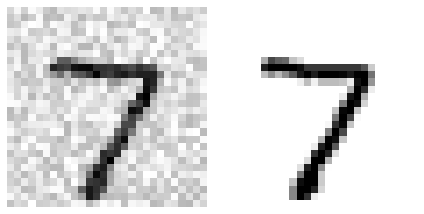

In [8]:
some_index = 0

plt.subplot(121); plot_digit(X_test_mod[some_index])
plt.subplot(122); plot_digit(y_test_mod[some_index])

save_fig("noisy_digit_example_plot")

plt.show()

- 왼쪽 : 잡음이 섞인 이미지
- 오른쪽 : 깨끗한 타깃 이미지

<br>

### 3.7.2.4 분류기 학습 및 예측

In [9]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_mod, y_train_mod)

KNeighborsClassifier()

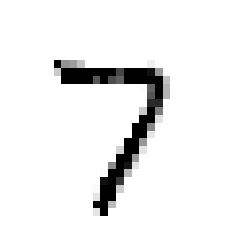

In [10]:
clean_digit = knn_clf.predict([X_test_mod[some_index]])
plot_digit(clean_digit)